# Mandelbrot set

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import imageio.v2 as imageio
import base64
from IPython.display import display, Image as IPythonImage
from PIL import Image


In [6]:
def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    if n == max_iter:
        return max_iter
    return n + 1 - np.log(np.log2(abs(z)))

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2])

# def plot_mandelbrot(xmin, xmax, ymin, ymax, max_iter=256, width=600, height=400):
#     img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
#     plt.figure(figsize=(10, 6))
#     plt.imshow(img, extent=(xmin, xmax, ymin, ymax), cmap="jet")  # prism, jet is also cool
#     plt.colorbar()
#     plt.show()

def plot_mandelbrot(xmin, xmax, ymin, ymax, max_iter=256, width=600, height=400):
    # Calculate zoom factor and adjust max_iter accordingly
    initial_zoom_width = 3.5  # Initial width of the view (full Mandelbrot set typically spans from about -2.5 to 1)
    current_zoom_width = xmax - xmin
    zoom_ratio = initial_zoom_width / current_zoom_width
    adjusted_max_iter = int(max_iter * np.log2(zoom_ratio + 1))

    img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, adjusted_max_iter)
    plt.figure(figsize=(10, 6))
    plt.imshow(img, extent=(xmin, xmax, ymin, ymax), cmap="jet", origin="lower")
    plt.colorbar()
    plt.show()

In [17]:
def save_frame(xmin, xmax, ymin, ymax, filename, max_iter=256, width=600, height=400):
    img = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img, extent=(xmin, xmax, ymin, ymax), cmap='jet', aspect='auto')
    ax.axis('off')  # Turn off axis
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)  # Adjust subplot to remove margin
    plt.savefig(filename, dpi=fig.dpi, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

def create_zoom_gif(start_bounds, end_bounds, steps, output_gif, width=600, height=400, max_iter=256):
    if not os.path.exists('frames'):
        os.makedirs('frames')

    images = []
    for step in range(steps):
        print(f'Processing step {step+1} of {steps}')  # Report current step

        xmin = np.linspace(start_bounds[0], end_bounds[0], steps)[step]
        xmax = np.linspace(start_bounds[1], end_bounds[1], steps)[step]
        ymin = np.linspace(start_bounds[2], end_bounds[2], steps)[step]
        ymax = np.linspace(start_bounds[3], end_bounds[3], steps)[step]

        frame_filename = f'frames/frame_{step:04d}.png'
        save_frame(xmin, xmax, ymin, ymax, frame_filename, max_iter, width, height)
        images.append(imageio.imread(frame_filename))

    if len(set(img.shape for img in images)) != 1:
        uniform_size = (height, width)  # Expected dimensions
        images = [np.array(Image.fromarray(img).resize(uniform_size, Image.LANCZOS)) for img in images]

    imageio.mimsave(output_gif, images, duration=0.8, loop=0)

    # Clean up frames directory
    for frame_filename in os.listdir('frames'):
        os.remove(f'frames/{frame_filename}')
    os.rmdir('frames')

    # Display the GIF
    with open(output_gif, 'rb') as f:
        gif_data = f.read()
        b64 = base64.b64encode(gif_data).decode('utf-8')
        display(IPythonImage(url=f"data:image/gif;base64,{b64}"))

    print("GIF creation complete.")  # Indicate completion

Processing step 1 of 30
Processing step 2 of 30
Processing step 3 of 30
Processing step 4 of 30
Processing step 5 of 30
Processing step 6 of 30
Processing step 7 of 30
Processing step 8 of 30
Processing step 9 of 30
Processing step 10 of 30
Processing step 11 of 30
Processing step 12 of 30
Processing step 13 of 30
Processing step 14 of 30
Processing step 15 of 30
Processing step 16 of 30
Processing step 17 of 30
Processing step 18 of 30
Processing step 19 of 30
Processing step 20 of 30
Processing step 21 of 30
Processing step 22 of 30
Processing step 23 of 30
Processing step 24 of 30
Processing step 25 of 30
Processing step 26 of 30
Processing step 27 of 30
Processing step 28 of 30
Processing step 29 of 30
Processing step 30 of 30



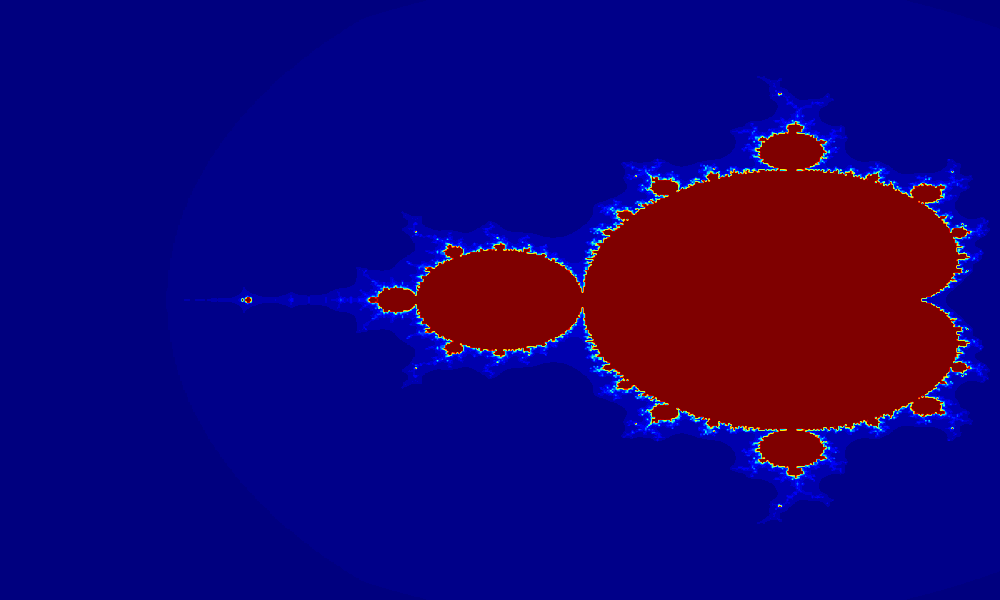

GIF creation complete.


In [19]:
# xmin=-1.03,
# xmax=-1.025, 
# ymin=-0.363, 
# ymax=-0.358, 

create_zoom_gif((-2.5, 0.5, -1.5, 1.5), (-1.03, -1.025, -0.363, -0.358), 30, 'mandelbrot_zoom.gif')

Processing step 1 of 50
Processing step 2 of 50
Processing step 3 of 50
Processing step 4 of 50
Processing step 5 of 50
Processing step 6 of 50
Processing step 7 of 50
Processing step 8 of 50
Processing step 9 of 50
Processing step 10 of 50
Processing step 11 of 50
Processing step 12 of 50
Processing step 13 of 50
Processing step 14 of 50
Processing step 15 of 50
Processing step 16 of 50
Processing step 17 of 50
Processing step 18 of 50
Processing step 19 of 50
Processing step 20 of 50
Processing step 21 of 50
Processing step 22 of 50
Processing step 23 of 50
Processing step 24 of 50
Processing step 25 of 50
Processing step 26 of 50
Processing step 27 of 50
Processing step 28 of 50
Processing step 29 of 50
Processing step 30 of 50
Processing step 31 of 50
Processing step 32 of 50
Processing step 33 of 50
Processing step 34 of 50
Processing step 35 of 50
Processing step 36 of 50
Processing step 37 of 50
Processing step 38 of 50
Processing step 39 of 50
Processing step 40 of 50
Processin


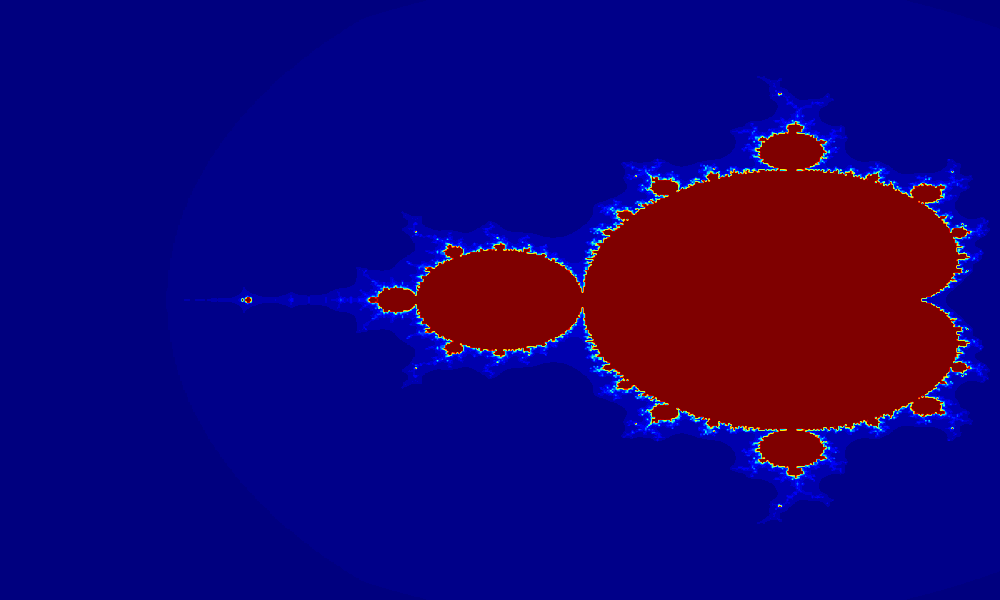

GIF creation complete.


In [18]:
create_zoom_gif((-2.5, 0.5, -1.5, 1.5), (1.02778,-1.02774,-0.36229,-0.36226), 50, 'mandelbrot_zoom.gif')

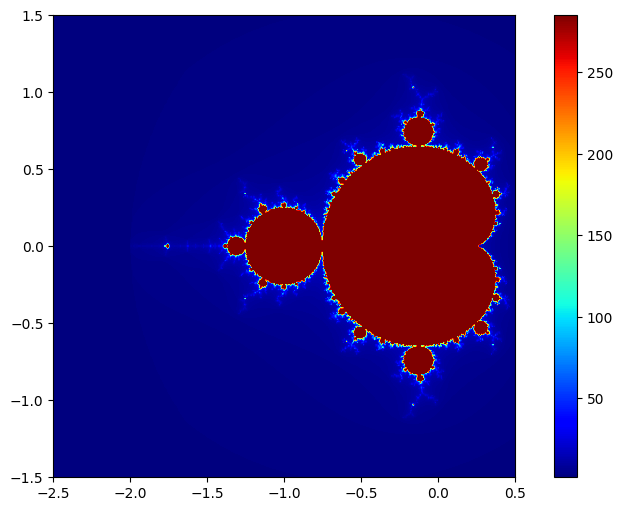

In [5]:
plot_mandelbrot(
    xmin=-2.5, 
    xmax=0.5, 
    ymin=-1.5, 
    ymax=1.5, 
    max_iter=256, 
    width=600, 
    height=400,
)

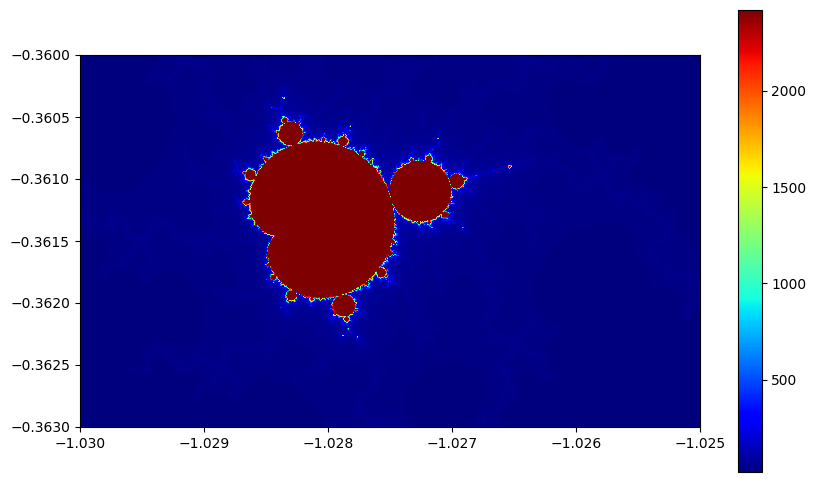

In [33]:
    # xmin=-1.415, 
    # xmax=-1.42, 
    # ymin=-0.002, 
    # ymax=0.002, 

plot_mandelbrot(
    xmin=-1.03,
    xmax=-1.025, 
    ymin=-0.363, 
    ymax=-0.360, 
    max_iter=256, 
    width=600, 
    height=400,
)

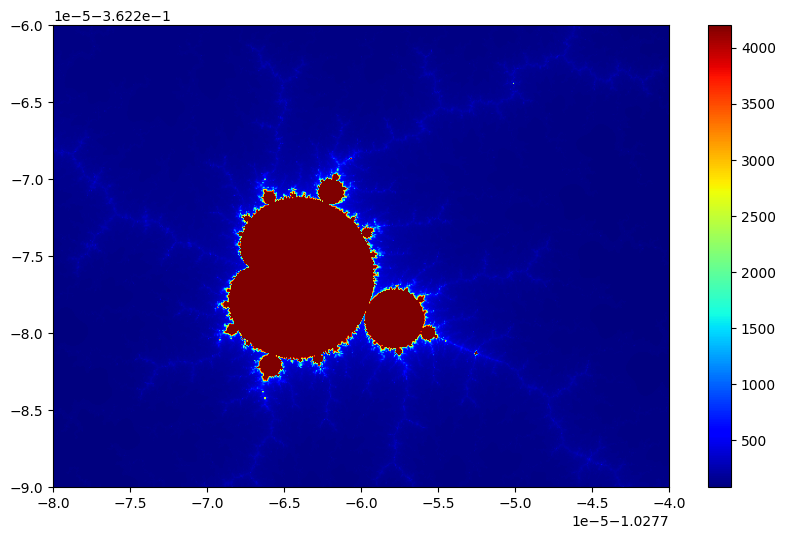

In [11]:
plot_mandelbrot(
    xmin=-1.02778,
    xmax=-1.02774, 
    ymin=-0.36229, 
    ymax=-0.36226, 
    max_iter=256, 
    width=600, 
    height=400,
)